In [27]:
#Sistem Rekomendasi Content-Based Filtering dengan TensorFlow dan Evaluasi Akurasi

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack


##Load Data
# Tahap 1: Tahapan ini adalah langkah awal, yaitu mengambil data dari sumbernya dan memasukkannya ke dalam program Python

In [28]:
df = pd.read_csv("products.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   867 non-null    object 
 1   Price   867 non-null    float64
 2   Rating  867 non-null    float64
 3   Colors  867 non-null    int64  
 4   Size    867 non-null    object 
 5   Gender  867 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 40.8+ KB


In [30]:
df.head()

,Title,Price,Rating,Colors,Size,Gender
0,T-shirt 2,1634400.0,3.9,3,M,Women
1,Hoodie 3,7950080.0,4.8,3,L,Unisex
2,Pants 4,7476960.0,3.3,3,XL,Men
3,Outerwear 5,5145440.0,3.5,3,XXL,Women
4,Jacket 6,2453920.0,3.3,3,S,Unisex


##Data Cleaning
### Tahap 2 :  Memastikan data bersih dan konsisten agar tidak memengaruhi hasil

In [31]:
df.isnull().sum()

,0
Title,0
Price,0
Rating,0
Colors,0
Size,0
Gender,0


In [32]:
df.duplicated().sum()

np.int64(0)

##Preprocessing Data
### Tahap 3: Menyiapkan data agar siap digunakan oleh model machine learning


In [33]:
#Mengubah data teks dan kategorikal menjadi bentuk numerik.
tfidf = TfidfVectorizer(stop_words='english')
title_matrix = tfidf.fit_transform(df['Title'])

encoder = OneHotEncoder()
categorical_matrix = encoder.fit_transform(df[['Size', 'Gender']])

scaler = MinMaxScaler()
numeric_matrix = scaler.fit_transform(df[['Price', 'Rating', 'Colors']])

In [34]:
# Gabungkan semua fitur
feature_matrix = hstack([title_matrix, categorical_matrix, numeric_matrix])

In [35]:
# Membuat label dummy (contoh: kategori Gender sebagai target)
y = df['Gender']

##Train-Test Split
###Tahap 4: Melatih model dengan sebagian data (training) dan mengujinya dengan data lain (testing) untuk mengevaluasi performa

In [36]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.2, random_state=42)

##Membangun Model TensorFlow untuk Klasifikasi
### Tahap 5: Menggunakan TensorFlow (keras) untuk membuat model klasifikasi, misalnya mengklasifikasikan produk ke dalam kategori fashion

In [37]:
#Encode target label ke integer
label_map = {label: idx for idx, label in enumerate(y.unique())}
y_train_encoded = np.array([label_map[val] for val in y_train])
y_test_encoded = np.array([label_map[val] for val in y_test])


In [38]:
# Menggunakan TensorFlow untuk melatih model prediksi Gender
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(y.unique()), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Train model
history = model.fit(X_train.toarray(), y_train_encoded, epochs=10, batch_size=32, verbose=1, validation_data=(X_test.toarray(), y_test_encoded))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6490 - loss: 1.0220 - val_accuracy: 1.0000 - val_loss: 0.7121
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.5455 - val_accuracy: 1.0000 - val_loss: 0.1821
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1019 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0164 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_los

In [40]:
# Evaluate model
loss, accuracy = model.evaluate(X_test.toarray(), y_test_encoded)
print("Akurasi Model: {:.2f}%".format(accuracy * 100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0022
Akurasi Model: 100.00%


In [41]:
# Classification report
y_pred = model.predict(X_test.toarray())
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test_encoded, y_pred_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        53

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



##Visualisasi Embedding Produk
### Tahap 6: Embedding adalah representasi vektor dari kata atau teks. Visualisasi ini digunakan untuk melihat kemiripan produk dalam ruang vektor

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


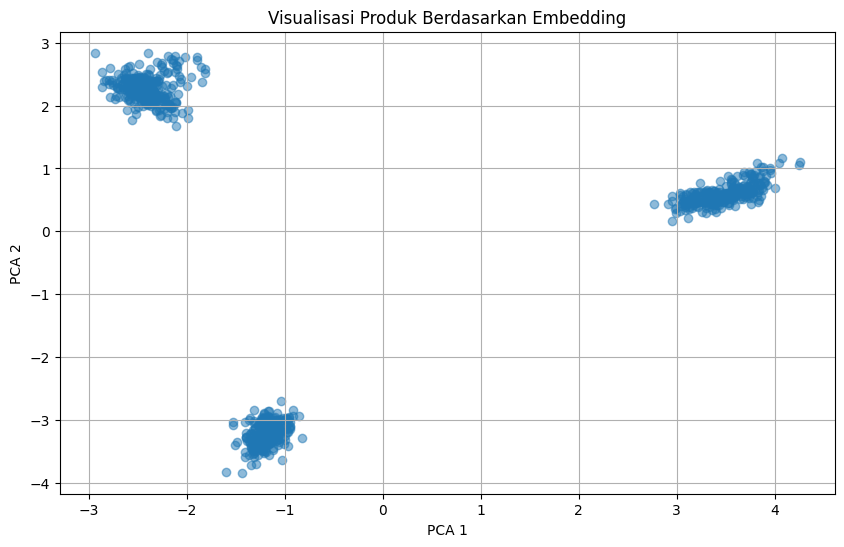

In [42]:
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
embeddings = embedding_model.predict(feature_matrix.toarray())

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10,6))
plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], alpha=0.5)
plt.title('Visualisasi Produk Berdasarkan Embedding')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

##Visualisasi Hasil Pelatihan
###Tahap 7 : Mevisualisasikan hasil model dengan menampilkan grafik Accuracy & Loss

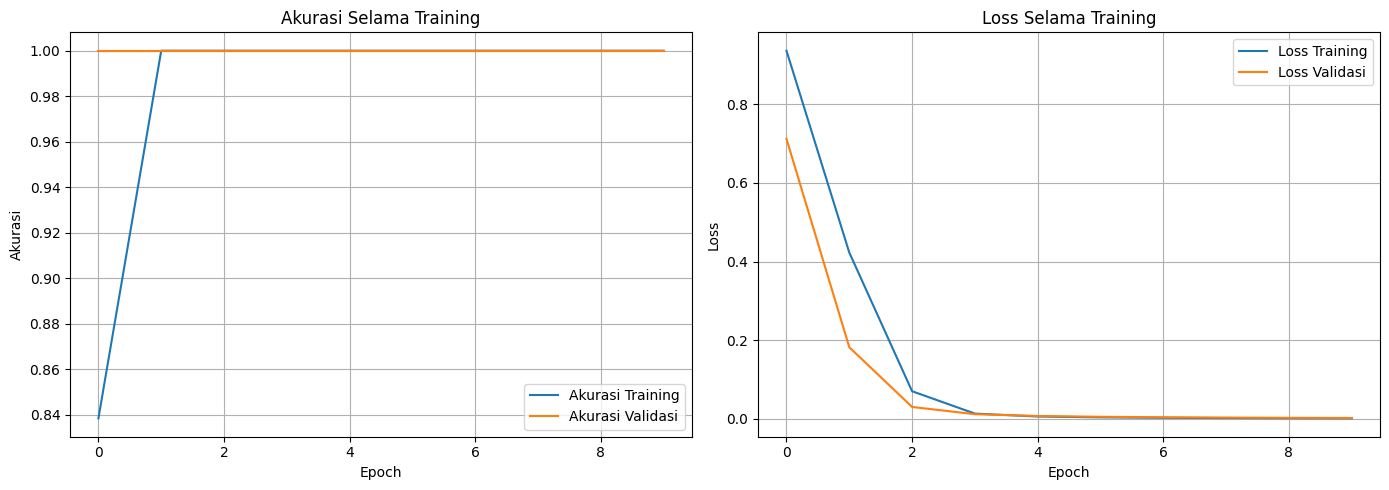

In [43]:

plt.figure(figsize=(14, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##Content-Based Filtering
###Tahap 8 : Sistem Rekomendasi Content-Based Filtering berdasarkan Rating Menghitung cosine similarity antar produk

In [44]:
# Fungsi rekomendasi berdasarkan rating tinggi dan kesamaan fitur
def recommend_by_rating(product_index, top_n=5):
    similarity_matrix = cosine_similarity(feature_matrix)
    similarity_scores = list(enumerate(similarity_matrix[product_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_indices = [i for i, score in similarity_scores[1:] if df.iloc[i]['Rating'] >= df.iloc[product_index]['Rating']]
    return df.iloc[similar_indices[:top_n]][['Title', 'Price', 'Rating']]

In [45]:
# Contoh penggunaan rekomendasi berdasarkan rating
print("\nRekomendasi produk mirip dengan rating setara atau lebih tinggi:")
print(recommend_by_rating(0))


Rekomendasi produk mirip dengan rating setara atau lebih tinggi:
           Title      Price  Rating
598  T-shirt 692  1416480.0     4.1
754  T-shirt 872  1343680.0     4.3
520  T-shirt 602  2260960.0     4.4
832  T-shirt 962  2887840.0     4.1
338  T-shirt 392  1226080.0     4.4
